# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?lat={lats[i]}&lon={lngs[i]}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url).json()
        # Parse the JSON and retrieve data
        city_weather = response['weather'][0]['main']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = lngs[i]
        city_lng = lats[i]
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = citipy.nearest_city(lats[i], lngs[i]).country_code
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    #time.sleep(1)
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | madang
Processing Record 2 of Set 1 | bambous virieux
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | wolmaranstad
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | kavieng
Processing Record 7 of Set 1 | arraial do cabo
Processing Record 8 of Set 1 | victoria
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | whyalla
Processing Record 11 of Set 1 | ponta do sol
Processing Record 12 of Set 1 | atar
Processing Record 13 of Set 1 | ilulissat
Processing Record 14 of Set 1 | troitskoye
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | korla
Processing Record 17 of Set 1 | riosucio
Processing Record 18 of Set 1 | russell
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | airai
Processing Record 21 of Set 1 | butaritari
Processing Record 22 of Set 1 | katherine
Processing Record 23 

Processing Record 46 of Set 4 | casa nova
Processing Record 47 of Set 4 | mount gambier
Processing Record 48 of Set 4 | san joaquin
Processing Record 49 of Set 4 | vaitupu
Processing Record 0 of Set 5 | cidreira
Processing Record 1 of Set 5 | micheweni
Processing Record 2 of Set 5 | saint george
Processing Record 3 of Set 5 | pogar
Processing Record 4 of Set 5 | neiafu
Processing Record 5 of Set 5 | san pedro
Processing Record 6 of Set 5 | longyearbyen
Processing Record 7 of Set 5 | rio grande
Processing Record 8 of Set 5 | rawson
Processing Record 9 of Set 5 | santiago del estero
Processing Record 10 of Set 5 | boueni
Processing Record 11 of Set 5 | stjordalshalsen
Processing Record 12 of Set 5 | camacha
Processing Record 13 of Set 5 | acajutla
Processing Record 14 of Set 5 | alofi
Processing Record 15 of Set 5 | taltal
Processing Record 16 of Set 5 | kailua
Processing Record 17 of Set 5 | thinadhoo
Processing Record 18 of Set 5 | mishelevka
Processing Record 19 of Set 5 | lompoc
Proc

Processing Record 46 of Set 8 | tuatapere
Processing Record 47 of Set 8 | zeya
Processing Record 48 of Set 8 | mount isa
Processing Record 49 of Set 8 | miloslavskoye
Processing Record 0 of Set 9 | fare
Processing Record 1 of Set 9 | chimbarongo
Processing Record 2 of Set 9 | upata
Processing Record 3 of Set 9 | guerrero
Processing Record 4 of Set 9 | belyy yar
Processing Record 5 of Set 9 | sukumo
Processing Record 6 of Set 9 | deputatskiy
Processing Record 7 of Set 9 | loding
Processing Record 8 of Set 9 | solnechnyy
Processing Record 9 of Set 9 | allapalli
Processing Record 10 of Set 9 | luwuk
Processing Record 11 of Set 9 | aswan
Processing Record 12 of Set 9 | karachi
Processing Record 13 of Set 9 | jasper
Processing Record 14 of Set 9 | puro
Processing Record 15 of Set 9 | ballina
Processing Record 16 of Set 9 | shenjiamen
Processing Record 17 of Set 9 | mayumba
Processing Record 18 of Set 9 | iwata
Processing Record 19 of Set 9 | toungoo
Processing Record 20 of Set 9 | tukrah
Pr

Processing Record 44 of Set 12 | la ronge
Processing Record 45 of Set 12 | saint andrews
Processing Record 46 of Set 12 | agadir
Processing Record 47 of Set 12 | bogotol
Processing Record 48 of Set 12 | mahina
Processing Record 49 of Set 12 | galesong
Processing Record 0 of Set 13 | garowe
Processing Record 1 of Set 13 | ostrovnoy
Processing Record 2 of Set 13 | braslav
Processing Record 3 of Set 13 | maridi
Processing Record 4 of Set 13 | cayenne
Processing Record 5 of Set 13 | xuddur
Processing Record 6 of Set 13 | arman
Processing Record 7 of Set 13 | prachin buri
Processing Record 8 of Set 13 | mantua
Processing Record 9 of Set 13 | calvinia
Processing Record 10 of Set 13 | qom
Processing Record 11 of Set 13 | marawi
Processing Record 12 of Set 13 | inongo
Processing Record 13 of Set 13 | sagua de tanamo
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          614
Lat           614
Lng           614
Max Temp      614
Humidity      614
Cloudiness    614
Wind Speed    614
Country       614
Date          614
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,madang,147.294144,-4.168534,301.15,74,90,3.74,pg,1680372481
1,bambous virieux,80.145890,-40.078280,290.38,70,42,5.14,mu,1680372481
2,busselton,83.481896,-85.122200,227.82,99,93,6.17,au,1680372482
3,wolmaranstad,25.752971,-27.249475,294.65,41,77,3.65,za,1680372482
4,ribeira grande,-30.398997,34.107196,292.43,89,100,6.01,pt,1680372483


In [47]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [48]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
415,ballina,-154.530269,-89.843179,239.00,90,100,6.44,pf,1680372702
591,kingston,-101.445586,-89.564562,238.57,90,100,5.94,cl,1680372783
214,alofi,-11.859330,-89.470432,240.03,85,100,7.74,za,1680372586
281,faanui,81.991896,-89.437378,239.47,87,100,8.26,au,1680372625
330,guerrero negro,169.741699,-88.958673,237.47,97,100,6.50,nz,1680372652


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

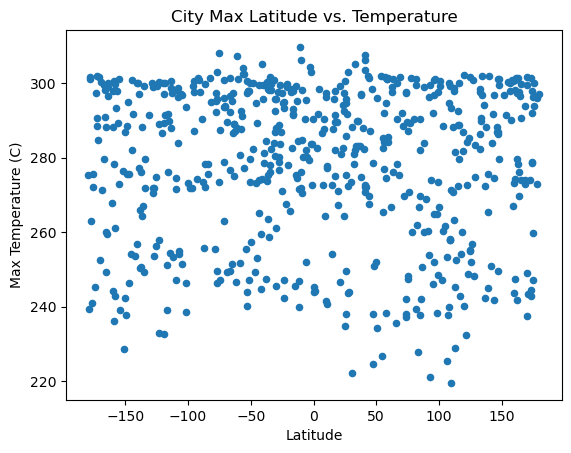

In [15]:
# Build scatter plot for latitude vs. temperature
city_data_df = city_data_df.sort_values('Lng')
city_data_df.plot.scatter('Lat', 'Max Temp')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

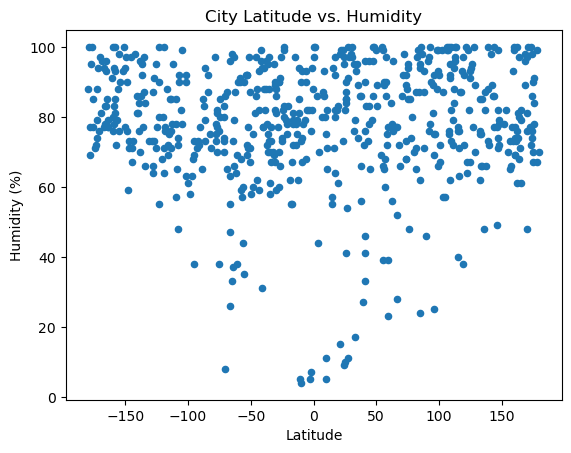

In [16]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter('Lat', 'Humidity')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

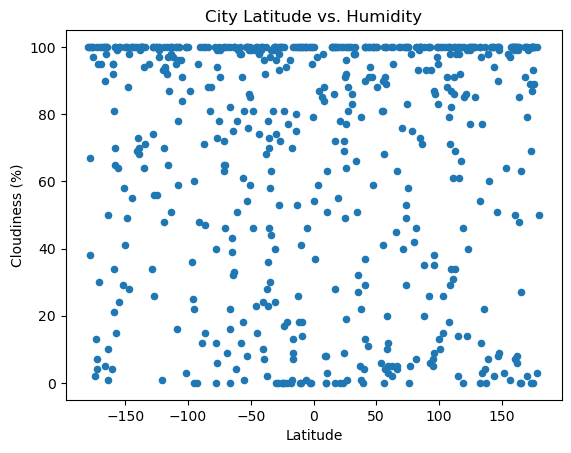

In [17]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter('Lat', 'Cloudiness')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Humidity')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

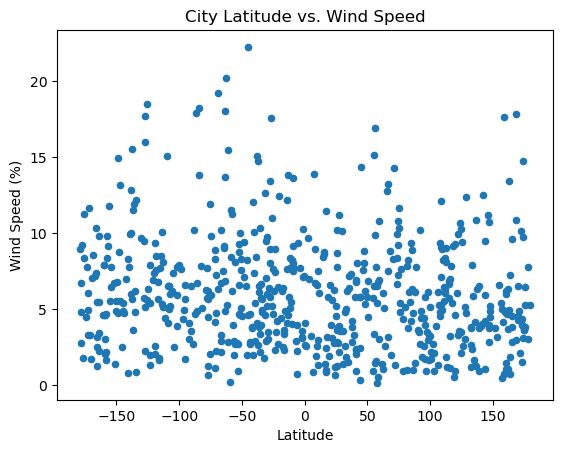

In [18]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter('Lat', 'Wind Speed')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
plt.title('City Latitude vs. Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
281,faanui,81.991896,-89.437378,239.47,87,100,8.26,au,1680372625
330,guerrero negro,169.741699,-88.958673,237.47,97,100,6.50,nz,1680372652
253,kahului,47.217879,-88.349734,237.94,96,100,8.03,za,1680372601
369,port blair,74.017248,-87.784005,237.97,92,100,7.25,au,1680372673
512,grand river south east,57.817101,-87.690734,238.19,90,100,6.52,za,1680372748


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
415,ballina,-154.530269,-89.843179,239.00,90,100,6.44,pf,1680372702
591,kingston,-101.445586,-89.564562,238.57,90,100,5.94,cl,1680372783
214,alofi,-11.859330,-89.470432,240.03,85,100,7.74,za,1680372586
68,tolbazy,-149.882564,-88.518612,237.65,97,100,6.77,pf,1680372519
143,havelock,-52.719067,-88.427538,240.13,92,100,6.60,ar,1680372543


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.036742409244600864


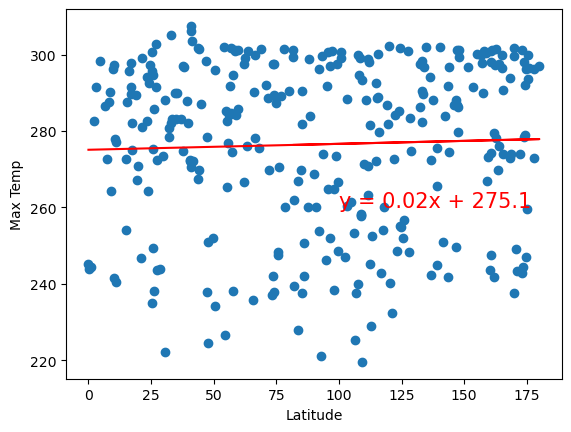

In [32]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (100,260), fontsize=15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

The r-value is: 0.13008931296758866


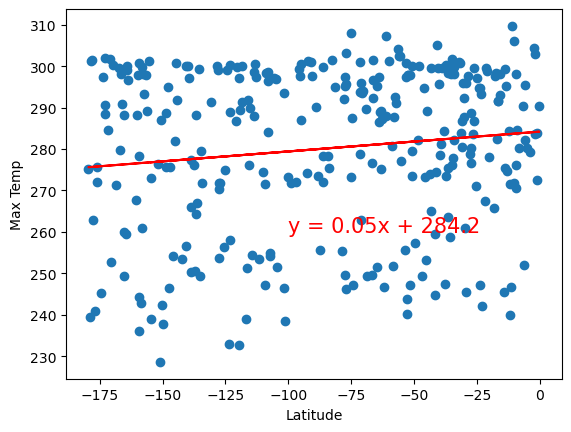

In [34]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-100,260), fontsize=15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** 

There is a slight correlation with Latitude and the max temperature for a day. Typically, there is much more of a correlation with latitude and temperature, but we may infer that due to northern hemisphere moving into spring, and the southern hemisphere moving into fall, the amount of sunlight is closer to equal for both hemispheres. This likely means there will be a lot more chaotic weather patterns, and thus variance in temperatures.

Given the very small r-values reported, this correlation is not great for forecasting. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.12031199212062646


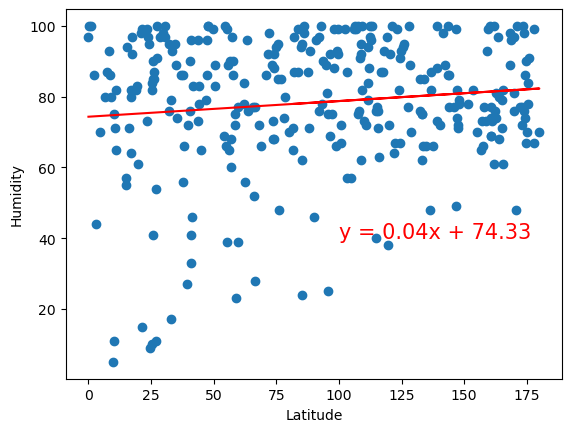

In [37]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (100,40), fontsize=15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-value is: -0.21351058084953298


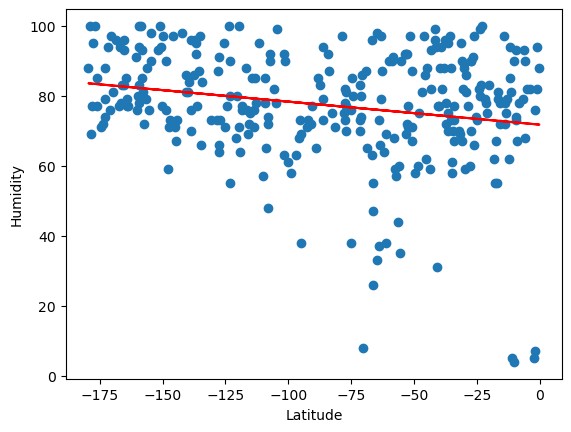

In [38]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-100,260), fontsize=15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** 
Similarly to temperature, it's likely that because we are in flux seasons for the northern and southern hemispheres, there is little correlation to humidity. 
It's also equally as likely that there is no correlation between latitude and humidity

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.07942624475539847


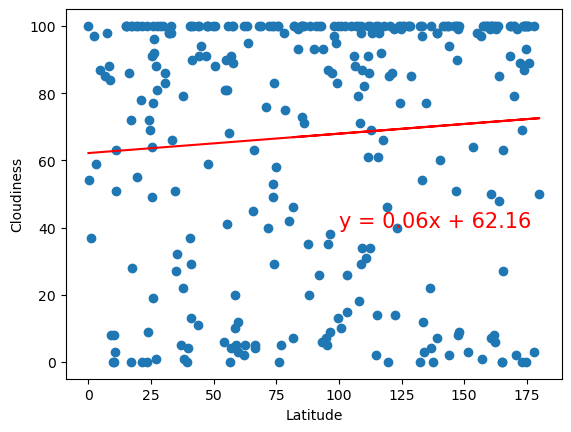

In [39]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (100,40), fontsize=15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-value is: -0.1442781822861329


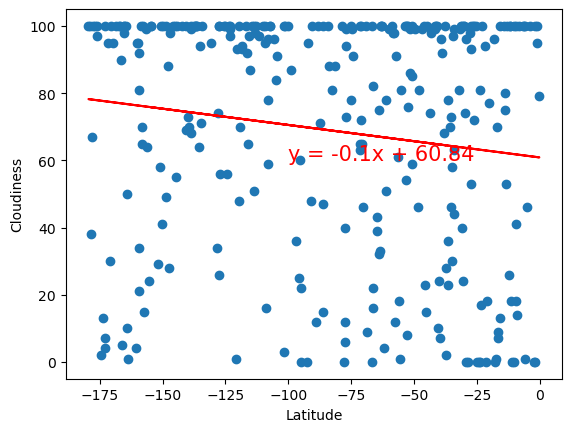

In [41]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-100,60), fontsize=15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** 
Given the very small r-values, it's unlikely that there exists a true correlation between cloudiness and latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.022481070207340977


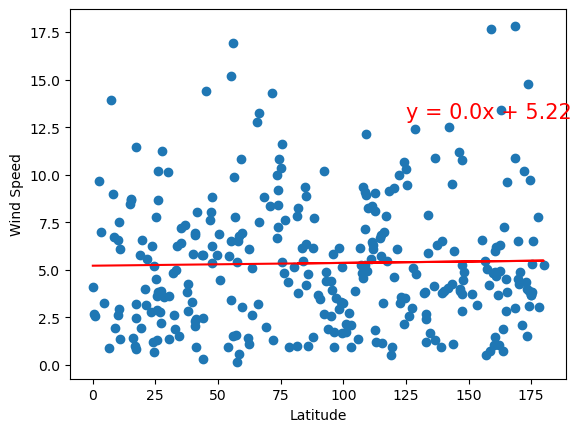

In [43]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (125,13), fontsize=15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-value is: 0.005561763604735687


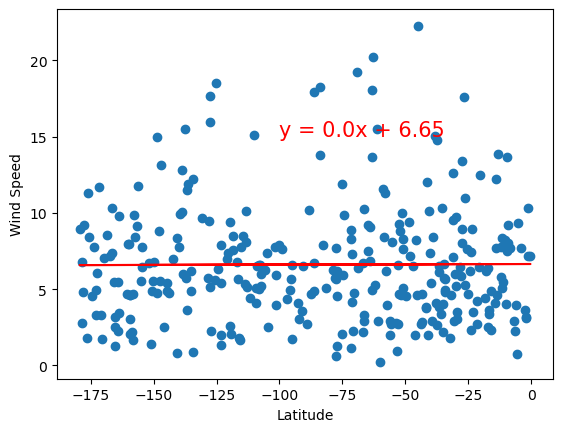

In [45]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-100,15), fontsize=15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:**
Given the small r-values for both hemispheres, it's unlikely that wind speed is correlated with Latitude. 